# Load libraries and data for Figure 5

In [3]:
from library import *

area_dict, active_area_dict = load_area_dicts(session_ids)
path = './files/adjacency_matrices'
G_ccg_dict, offset_dict, duration_dict = load_graphs(path, active_area_dict, weight=True)
measure = 'ccg'
n = 4
S_ccg_dict = add_sign(G_ccg_dict)
S_ccg_dict = add_offset(S_ccg_dict, offset_dict)
S_ccg_dict = add_duration(S_ccg_dict, duration_dict)
S_ccg_dict = add_delay(S_ccg_dict)

with open('./files/signal_correlation_dict.pkl', 'rb') as f:
  signal_correlation_dict = pickle.load(f)
################# max pos & neg resolution for Hamiltonian
resolution_list = np.arange(0, 2.1, 0.1)
resolution_list = [round(reso, 2) for reso in resolution_list]
sessions, stimuli = get_session_stimulus(G_ccg_dict)
with open('./files/best_comms_dict.pkl', 'rb') as f:
  best_comms_dict = pickle.load(f)
with open('./files/real_Hamiltonian.npy', 'rb') as f:
  real_Hamiltonian = np.load(f)
with open('./files/subs_Hamiltonian.npy', 'rb') as f:
  subs_Hamiltonian = np.load(f)

max_reso_subs = get_max_dH_pos_neg_resolution(sessions, stimuli, resolution_list, real_Hamiltonian, subs_Hamiltonian)

719161530_spontaneous.npz
719161530_flash_light.npz
719161530_drifting_gratings.npz
719161530_flash_dark.npz
719161530_static_gratings.npz
719161530_natural_scenes.npz
719161530_natural_movie_three.npz
719161530_natural_movie_one.npz
750749662_spontaneous.npz
750749662_natural_movie_three.npz
750749662_flash_light.npz
750749662_drifting_gratings.npz
750749662_natural_movie_one.npz
750749662_natural_scenes.npz
750749662_flash_dark.npz
750749662_static_gratings.npz
754312389_natural_scenes.npz
754312389_natural_movie_three.npz
754312389_static_gratings.npz
754312389_spontaneous.npz
754312389_flash_dark.npz
754312389_flash_light.npz
754312389_drifting_gratings.npz
754312389_natural_movie_one.npz
755434585_spontaneous.npz
755434585_natural_movie_one.npz
755434585_flash_light.npz
755434585_natural_movie_three.npz
755434585_natural_scenes.npz
755434585_drifting_gratings.npz
755434585_flash_dark.npz
755434585_static_gratings.npz
756029989_spontaneous.npz
756029989_drifting_gratings.npz
756029

# Load data for Figure 5A

In [4]:
########################################## get signal correlation for within/across community VS stimulus
# pair_type = 'all'
pair_type = 'connected'
start_time = time.time()
signalcorr_within_across_comm_df = get_within_across_comm(G_ccg_dict, active_area_dict, signal_correlation_dict, best_comms_dict, pair_type=pair_type)
print("--- %s minutes" % ((time.time() - start_time)/60))

719161530
750749662
754312389
755434585
756029989
791319847
797828357
Drifting
gratings
Static
gratings
Natural
scenes
Natural
movies
--- 0.9046937346458435 minutes


# Plot Figure 5A

/home/dstang/miniconda3/envs/functional_network/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Drifting gratings 0.0 0.0
Static gratings 0.0 0.0
Natural scenes 4.203895392974451e-45 1.3284309441799266e-42
Natural movies 0.0 0.0


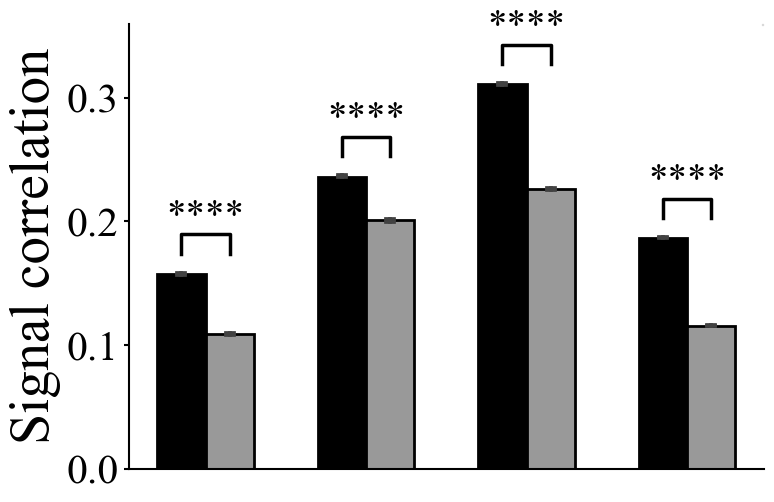

In [5]:
######################### merge all pairs from different mice into one distribution
plot_signal_correlation_within_across_comm_significance(signalcorr_within_across_comm_df, pair_type=pair_type)

# Load data for Figure 5B

In [6]:
################################ get module size and purity
size_dict, coverage_dict, purity_dict = get_module_size_coverage_purity(G_ccg_dict, active_area_dict, visual_regions, best_comms_dict)

719161530
750749662
754312389
755434585
756029989
791319847
797828357


# Plot Figure 5B

/home/dstang/functional_network_open/library.py:1848: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


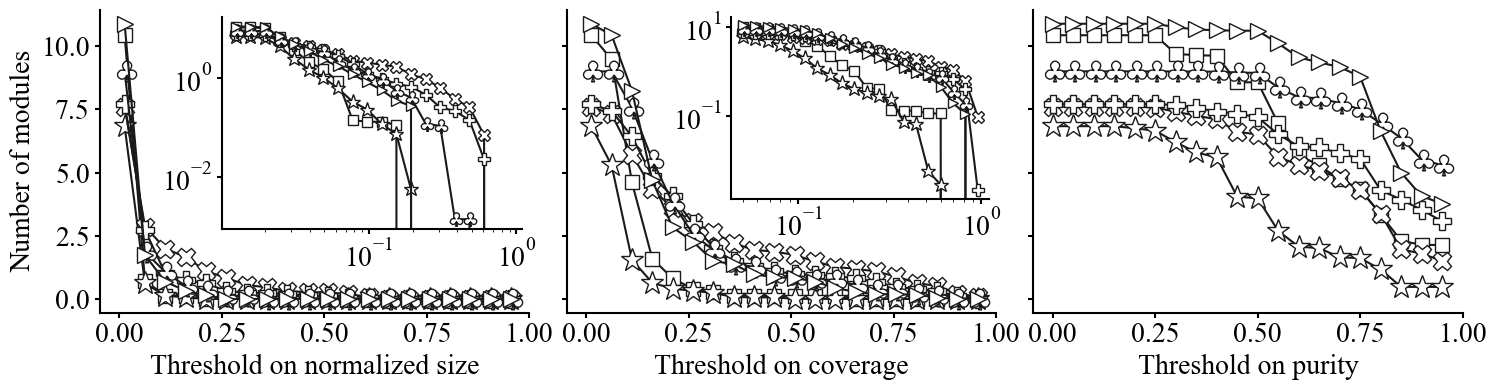

In [7]:
########################### merge data points from all mice into one distribution
sth_list_lin, sth_list_log, cth_list_lin, cth_list_log, pth_list = np.linspace(np.power(10, -1.9), np.power(10, -0.02), 20), np.logspace(-1.9, -0.02, 20), np.linspace(np.power(10, -1.9), np.power(10, -0.02), 20), np.logspace(-1.3, -0.02, 20), np.arange(0, 1, 0.05)
plot_num_module_VSpurity_threshold(size_dict, coverage_dict, purity_dict, sth_list_lin, sth_list_log, cth_list_lin, cth_list_log, pth_list)

# Load data for Figure 5C

In [8]:
################################ get module size and purity for all stimuli separately for area
size_dict, coverage_dict, purity_dict = get_module_size_coverage_purity_areawise(G_ccg_dict, active_area_dict, visual_regions, best_comms_dict)

719161530
750749662
754312389
755434585
756029989
791319847
797828357


# Plot Figure 5C

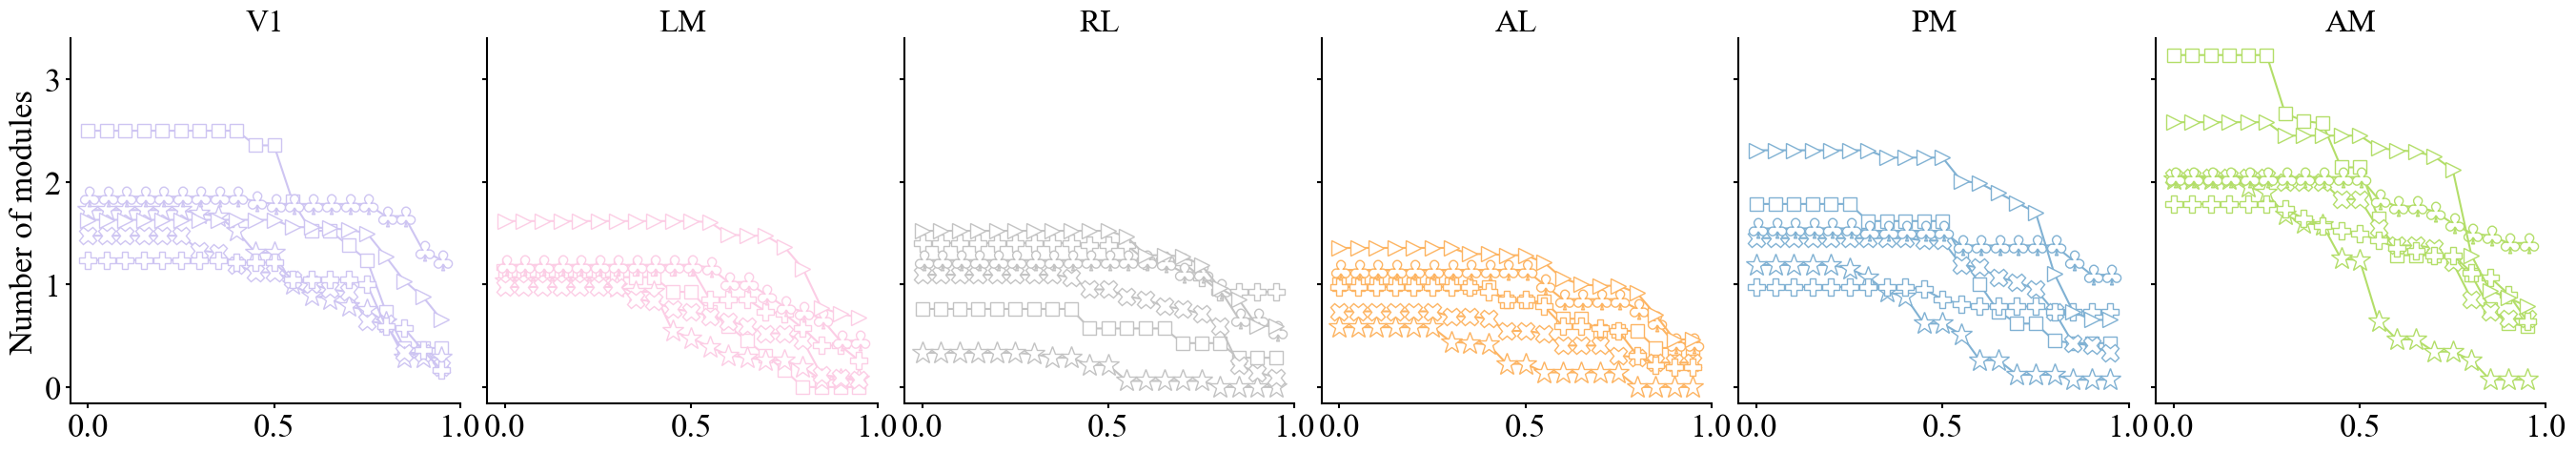

In [9]:
########################### plot number of modules for all stimuli areawise
pth_list = np.arange(0, 1, 0.05)
plot_num_module_VSpurity_threshold_areawise(purity_dict, pth_list, visual_regions)

# Load data for Figure 5D

In [11]:
################################ positive density and negative fraction of within/across module per area
start_time = time.time()
combined_stimulus_name = 'Natural\nscenes' # Figure 5D
data_within_across_comm_same_area_df, rand_across_comm_list, rand_across_pos_density_list, rand_across_pos_frac_list, rand_across_neg_frac_list = get_data_module_per_area(G_ccg_dict, active_area_dict, signal_correlation_dict, best_comms_dict, visual_regions, combined_stimulus_name)
print("--- %s minutes" % ((time.time() - start_time)/60))

natural_scenes
VISam
VISpm
VISal
VISrl
VISl
VISp
--- 0.7547396421432495 minutes


# Plot Figure 5D

Natural scenes 3.0535601523819638e-22 2.4304657678803077e-12
Natural scenes 1.0570248225878297e-17 1.1669017514239955e-19
Natural scenes 1.1991912636228858e-19 9.845943166135983e-15
Natural scenes 1.306249344979157e-16 6.23184907540611e-14
Natural scenes 3.8907510276349147e-19 2.459211890228061e-18
Natural scenes 3.531966865312809e-20 2.145388375298966e-17
Natural scenes 8.542061036416857e-23 1.934682326348573e-34
Natural scenes 8.947112668189981e-28 1.224182969697648e-16
Natural scenes 1.9254736645000207e-30 2.3927696415005046e-18
Natural scenes 5.085233371750386e-21 4.4733517562921266e-14
Natural scenes 1.3091951296933385e-14 8.161337680518861e-27
Natural scenes 2.555775042161165e-36 1.99457586539503e-28
Natural scenes 1.0567965047790794e-29 4.668990556684172e-28
Natural scenes 3.235086399926831e-38 7.70215731045783e-31
Natural scenes 1.120884628628778e-39 1.4839684812686672e-19
Natural scenes 2.7117743665348286e-33 9.226395713473622e-18
Natural scenes 6.419535575129987e-25 3.4062576

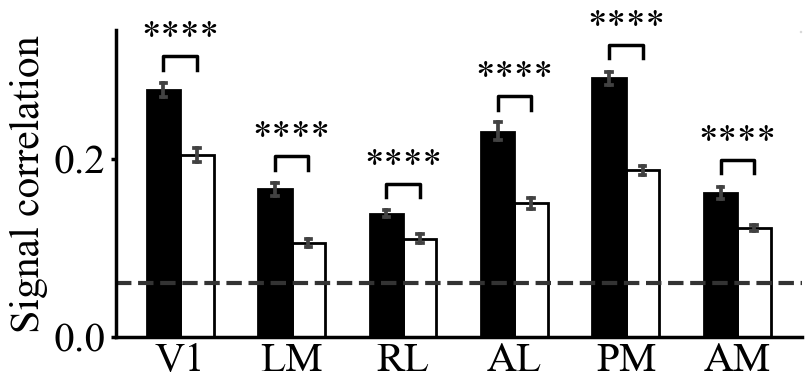

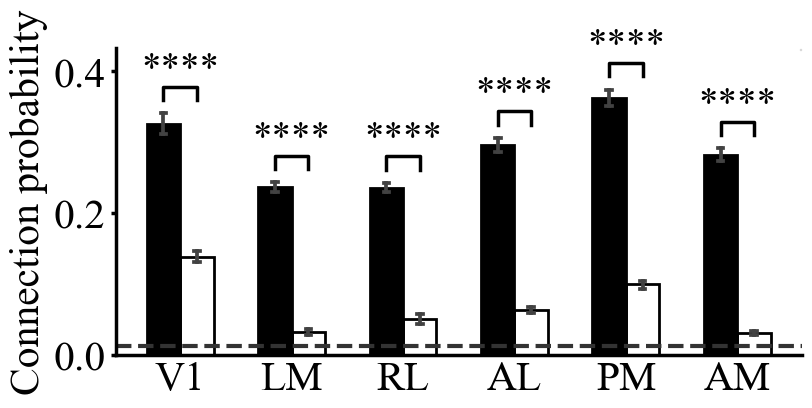

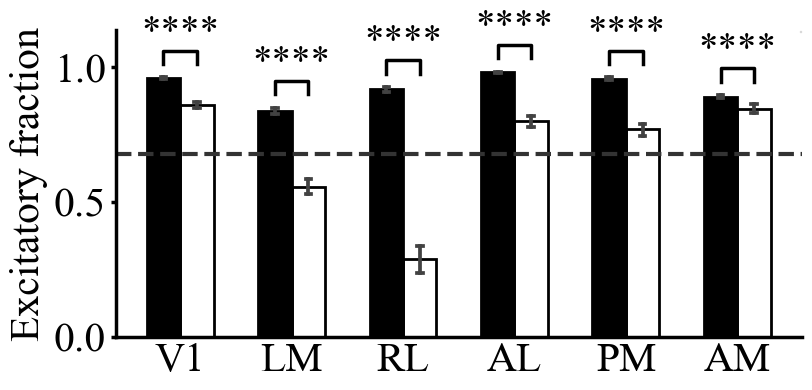

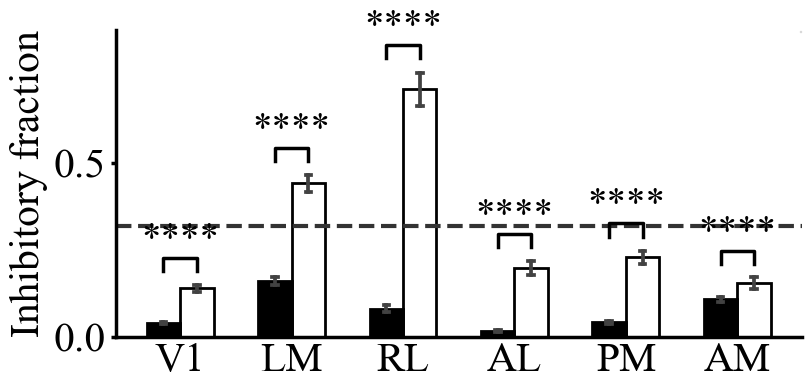

In [12]:
plot_data_within_across_comm_same_area_significance(data_within_across_comm_same_area_df, rand_across_comm_list, visual_regions, name='signal correlation', combined_stimulus_name=combined_stimulus_name)
plot_data_within_across_comm_same_area_significance(data_within_across_comm_same_area_df, rand_across_pos_density_list, visual_regions, name='positive density', combined_stimulus_name=combined_stimulus_name)
plot_data_within_across_comm_same_area_significance(data_within_across_comm_same_area_df, rand_across_pos_frac_list, visual_regions, name='positive fraction', combined_stimulus_name=combined_stimulus_name)
plot_data_within_across_comm_same_area_significance(data_within_across_comm_same_area_df, rand_across_neg_frac_list, visual_regions, name='negative fraction', combined_stimulus_name=combined_stimulus_name)

# Load data for Figure 5E

In [13]:
################################ positive density and negative fraction of within/across module per area
start_time = time.time()
combined_stimulus_name = 'Natural\nmovies' # Figure 5E
data_within_across_comm_same_area_df, rand_across_comm_list, rand_across_pos_density_list, rand_across_pos_frac_list, rand_across_neg_frac_list = get_data_module_per_area(G_ccg_dict, active_area_dict, signal_correlation_dict, best_comms_dict, visual_regions, combined_stimulus_name)
print("--- %s minutes" % ((time.time() - start_time)/60))

natural_movie_one
natural_movie_three
VISam
VISpm
VISal
VISrl
VISl
VISp
--- 1.6231358408927918 minutes


# Plot Figure 5E

Natural movies 1.2475117845684616e-25 2.2420775429197073e-44
Natural movies 7.219961780048895e-36 1.4640833178368339e-19
Natural movies 6.277199922886763e-25 2.4427397967882435e-20
Natural movies 2.2974102230169314e-37 4.2174283295771397e-17
Natural movies 8.055197370167747e-27 6.480875338781183e-32
Natural movies 1.759618328924073e-38 3.107795382513754e-16
Natural movies 7.502225083089313e-37 0.0
Natural movies 5.658541291525026e-30 0.0
Natural movies 6.932890993285365e-29 1.0861221736061054e-29
Natural movies 7.023884225735738e-27 2.122885362742991e-27
Natural movies 4.845724866181827e-27 0.0
Natural movies 7.292735558931716e-40 2.9907283733525846e-20
Natural movies 0.0 5.465064010866787e-44
Natural movies 0.0 5.3789319115624745e-37
Natural movies 0.0 2.5282824456428267e-27
Natural movies 0.0 1.6414215581666426e-27
Natural movies 0.0 1.3605528672826218e-32
Natural movies 2.802596928649634e-44 5.913153367913134e-30
Natural movies 0.0 5.465064010866787e-44
Natural movies 0.0 5.37997671

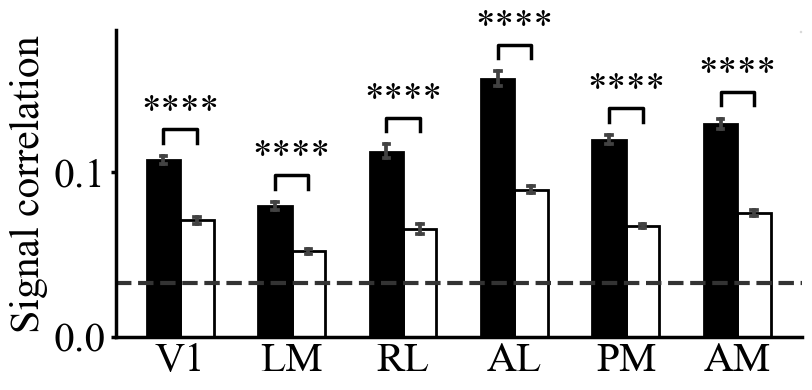

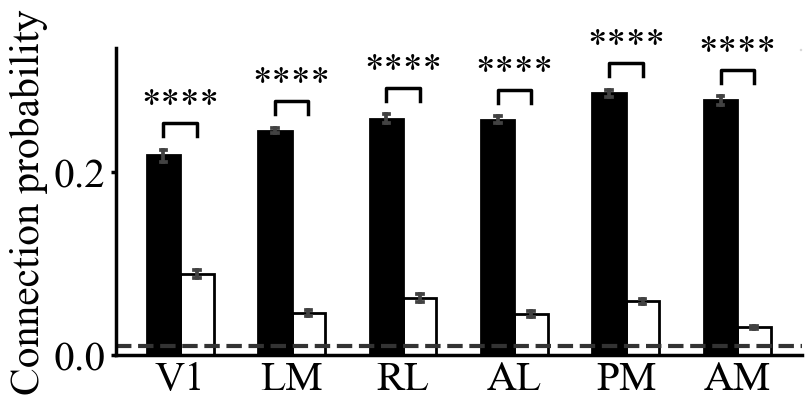

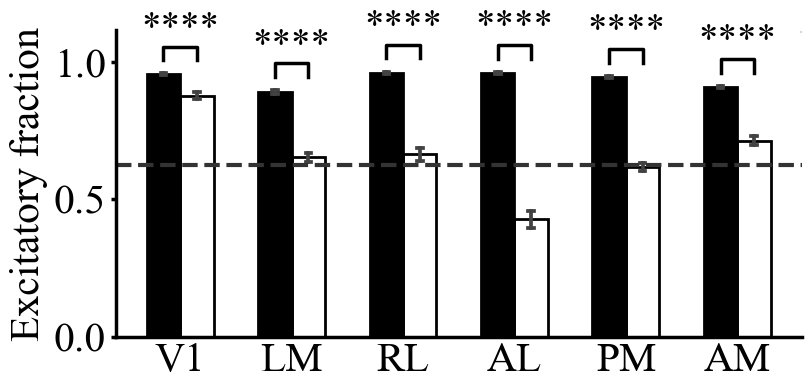

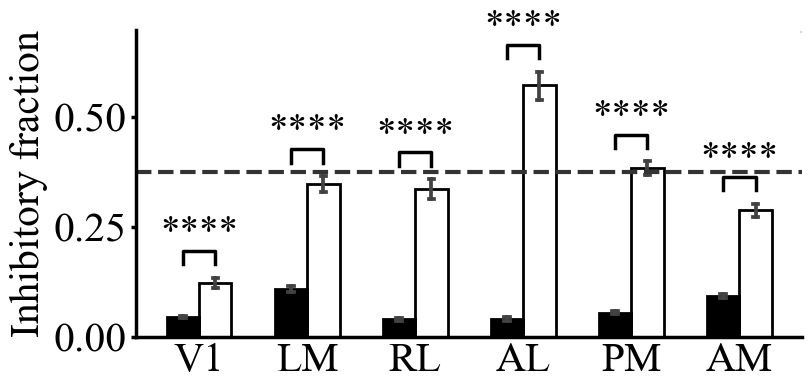

In [14]:
plot_data_within_across_comm_same_area_significance(data_within_across_comm_same_area_df, rand_across_comm_list, visual_regions, name='signal correlation', combined_stimulus_name=combined_stimulus_name)
plot_data_within_across_comm_same_area_significance(data_within_across_comm_same_area_df, rand_across_pos_density_list, visual_regions, name='positive density', combined_stimulus_name=combined_stimulus_name)
plot_data_within_across_comm_same_area_significance(data_within_across_comm_same_area_df, rand_across_pos_frac_list, visual_regions, name='positive fraction', combined_stimulus_name=combined_stimulus_name)
plot_data_within_across_comm_same_area_significance(data_within_across_comm_same_area_df, rand_across_neg_frac_list, visual_regions, name='negative fraction', combined_stimulus_name=combined_stimulus_name)